In [2]:
import numpy as np
import random
n = 40428967  #total number of records in the clickstream data 
sample_size = 100000
skip_values = sorted(random.sample(range(1,n), n-sample_size)) 

types_train = {
    'id': np.dtype(int),
    'click': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21':np.dtype(int)}

types_test = {
    'id': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21':np.dtype(int)
}

In [3]:
import pandas as pd
import gzip

parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')

with gzip.open('train.gz') as f:
    train = pd.read_csv(f, parse_dates = ['hour'], date_parser = parse_date, dtype=types_train, skiprows = skip_values)

train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10023200351270366469,0,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,1779deee,2347f47a,...,1,0,20596,320,50,2161,0,35,-1,157
1,10109886645702007556,0,2014-10-21,1005,0,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,1,0,17914,320,50,2043,2,39,-1,32
2,10183965787036689645,0,2014-10-21,1005,0,517b8671,ac5abf20,f028772b,ecad2386,7801e8d9,...,1,0,19870,320,50,2271,0,687,100077,48
3,10264440745186459272,0,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,e68eb5b0,2347f47a,...,1,2,18993,320,50,2161,0,35,-1,157
4,10267042859052731136,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79


In [4]:
train.shape

(100000, 24)

In [5]:
train.dtypes

id                          uint64
click                        int64
hour                datetime64[ns]
C1                           int64
banner_pos                   int64
site_id                     object
site_domain                 object
site_category               object
app_id                      object
app_domain                  object
app_category                object
device_id                   object
device_ip                   object
device_model                object
device_type                  int64
device_conn_type             int64
C14                          int64
C15                          int64
C16                          int64
C17                          int64
C18                          int64
C19                          int64
C20                          int64
C21                          int64
dtype: object

In [6]:
train['click'].value_counts()

0    83070
1    16930
Name: click, dtype: int64

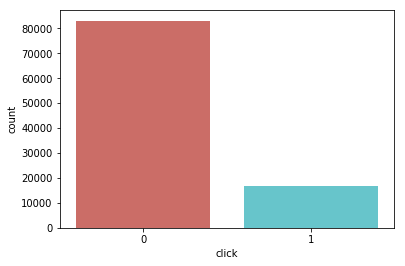

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='click',data=train, palette='hls')
plt.show()

In [9]:
train['click'].value_counts()/len(train)

0    0.8307
1    0.1693
Name: click, dtype: float64

In [10]:
train.hour.describe()

count                  100000
unique                    240
top       2014-10-22 09:00:00
freq                     1100
first     2014-10-21 00:00:00
last      2014-10-30 23:00:00
Name: hour, dtype: object

Text(0.5,1,'Number of clicks by hour')

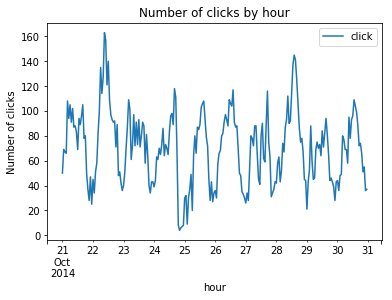

In [12]:
train.groupby('hour').agg({'click':'sum'}).plot()
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour')

In [13]:
train['hour_of_day']=train.hour.apply(lambda x:x.hour)

Text(0.5,1,'click trends by hour of day')

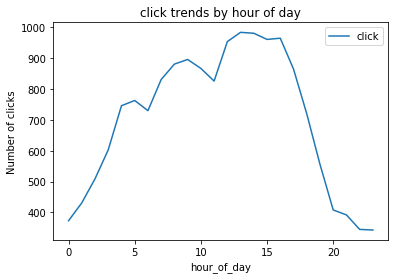

In [16]:
train.groupby('hour_of_day').agg({'click':'sum'}).plot()
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day')

Text(0.5,1,'Hourly impressions vs. clicks')

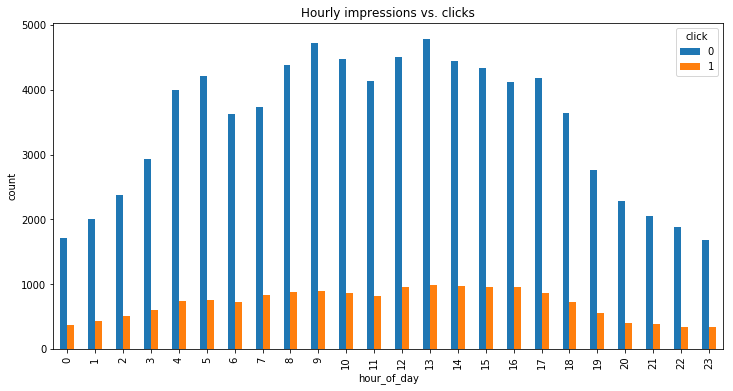

In [17]:
train.groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks')

Text(0.5,1,'Hourly CTR')

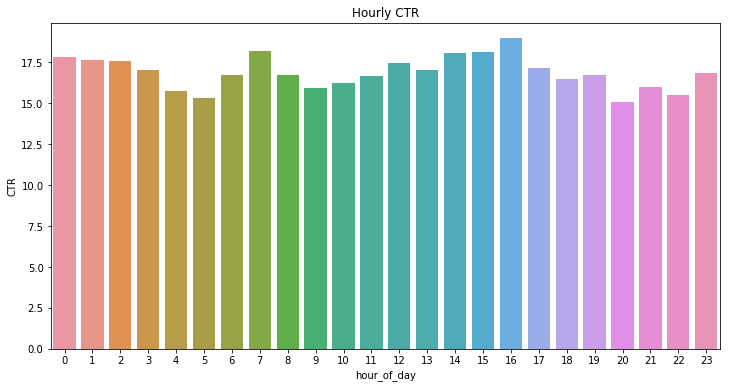

In [18]:
import seaborn as sns

df_click = train[train['click'] == 1]
df_hour = train[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()
df_hour = df_hour.rename(columns={'click': 'impressions'})
df_hour['clicks'] = df_click[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour_of_day', data=df_hour)
plt.title('Hourly CTR')

/Users/jenniferzhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """Entry point for launching an IPython kernel.


Text(0.5,1,'click trends by day of week')

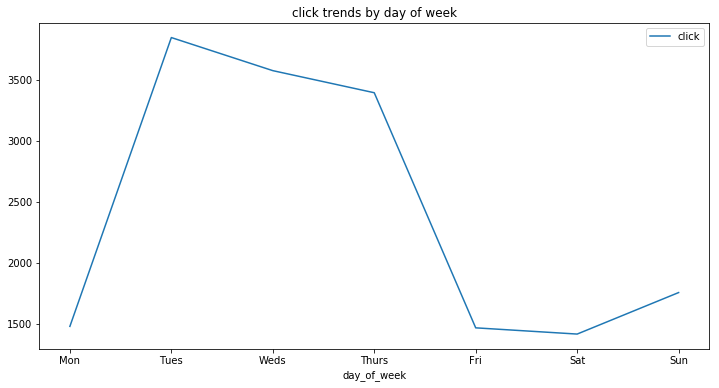

In [20]:
train['day_of_week'] = train['hour'].apply(lambda val: val.weekday_name)
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
train.groupby('day_of_week').agg({'click':'sum'}).reindex(cats).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('click trends by day of week')

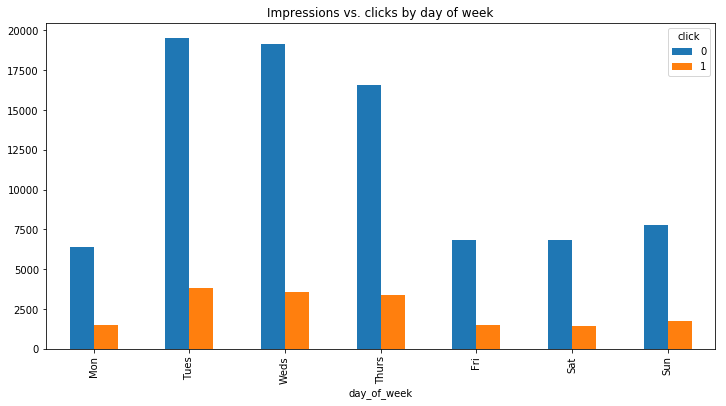

In [21]:
train.groupby(['day_of_week','click']).size().unstack().reindex(cats).plot(kind='bar', title="Day of the Week", figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Impressions vs. clicks by day of week');

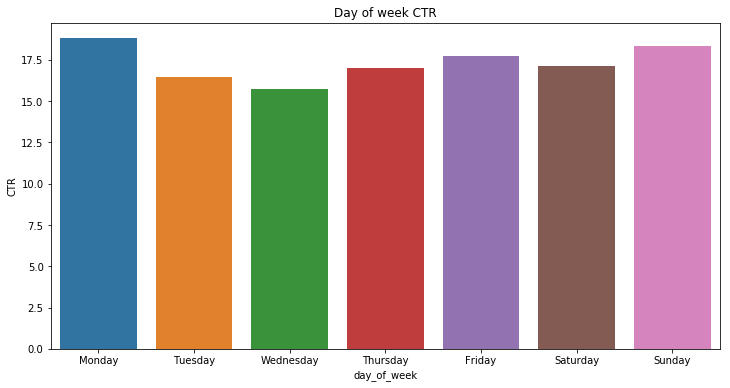

In [22]:
df_click = train[train['click'] == 1]
df_dayofweek = train[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'click': 'impressions'})
df_dayofweek['clicks'] = df_click[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()['click']
df_dayofweek['CTR'] = df_dayofweek['clicks']/df_dayofweek['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='day_of_week', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of week CTR');

In [23]:
print(train.C1.value_counts()/len(train))

1005    0.91974
1002    0.05440
1010    0.02174
1012    0.00294
1007    0.00076
1001    0.00029
1008    0.00013
Name: C1, dtype: float64


In [24]:
C1_values = train.C1.unique()
C1_values.sort()
ctr_avg_list=[]
for i in C1_values:
    ctr_avg=train.loc[np.where((train.C1 == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for C1 value: {},  click through rate: {}".format(i,ctr_avg))

for C1 value: 1001,  click through rate: 0.06896551724137931
for C1 value: 1002,  click through rate: 0.2125
for C1 value: 1005,  click through rate: 0.16854763302672496
for C1 value: 1007,  click through rate: 0.013157894736842105
for C1 value: 1008,  click through rate: 0.07692307692307693
for C1 value: 1010,  click through rate: 0.10349586016559338
for C1 value: 1012,  click through rate: 0.14625850340136054


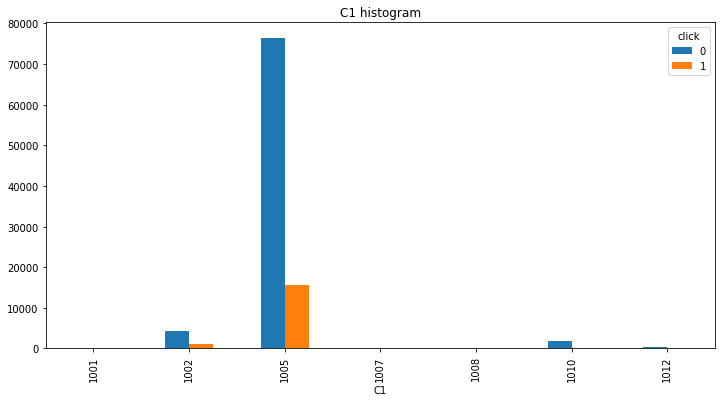

In [26]:
train.groupby(['C1', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C1 histogram');

Text(0.5,1,'CTR by C1')

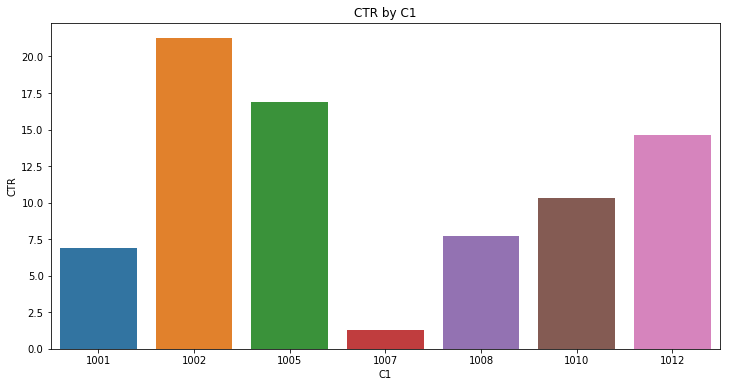

In [27]:
df_c1 = train[['C1','click']].groupby(['C1']).count().reset_index()
df_c1 = df_c1.rename(columns={'click': 'impressions'})
df_c1['clicks'] = df_click[['C1','click']].groupby(['C1']).count().reset_index()['click']
df_c1['CTR'] = df_c1['clicks']/df_c1['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C1', data=df_c1)
plt.title('CTR by C1')

In [28]:
train['click'].mean()


0.1693

In [29]:
df_c1.CTR.describe()


count     7.000000
mean     11.283550
std       6.756612
min       1.315789
25%       7.294430
50%      10.349586
75%      15.740307
max      21.250000
Name: CTR, dtype: float64

In [30]:
print(train.banner_pos.value_counts()/len(train))


0    0.71946
1    0.27889
7    0.00102
2    0.00029
4    0.00018
5    0.00013
3    0.00003
Name: banner_pos, dtype: float64


In [31]:
banner_pos = train.banner_pos.unique()
banner_pos.sort()
ctr_avg_list=[]
for i in banner_pos:
    ctr_avg=train.loc[np.where((train.banner_pos == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for banner position: {},  click through rate: {}".format(i,ctr_avg))

for banner position: 0,  click through rate: 0.16460956828732662
for banner position: 1,  click through rate: 0.1807881243501022
for banner position: 2,  click through rate: 0.1724137931034483
for banner position: 3,  click through rate: 0.0
for banner position: 4,  click through rate: 0.2222222222222222
for banner position: 5,  click through rate: 0.07692307692307693
for banner position: 7,  click through rate: 0.3431372549019608


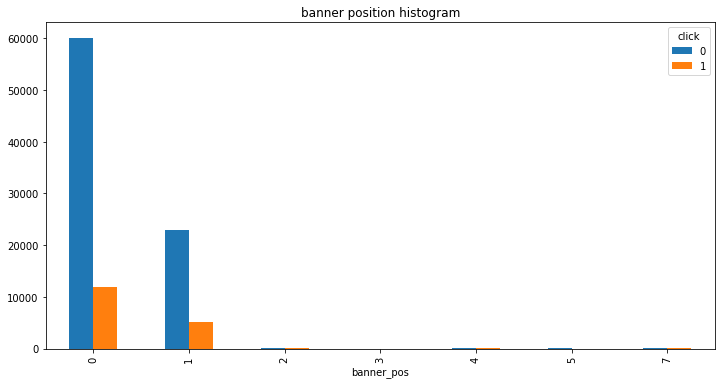

In [32]:
train.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='banner position histogram');

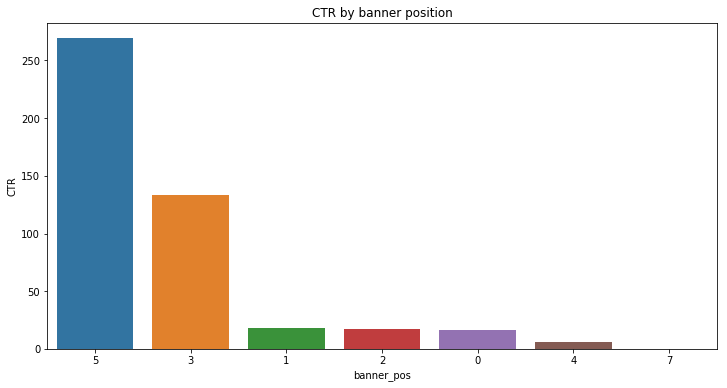

In [33]:
df_banner = train[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()
df_banner = df_banner.rename(columns={'click': 'impressions'})
df_banner['clicks'] = df_click[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']
df_banner['CTR'] = df_banner['clicks']/df_banner['impressions']*100
sort_banners = df_banner.sort_values(by='CTR',ascending=False)['banner_pos'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='banner_pos', data=df_banner, order=sort_banners)
plt.title('CTR by banner position');

In [34]:
df_banner.CTR.describe()


count      6.000000
mean      76.650134
std      105.770943
min        5.555556
25%       16.656062
50%       17.660096
75%      104.519703
max      269.230769
Name: CTR, dtype: float64

In [35]:
print("There are {} sites in the data set".format(train.site_id.nunique()))


There are 1468 sites in the data set


In [36]:
print('The top 10 site ids that have the most impressions')
print((train.site_id.value_counts()/len(train))[0:10])

The top 10 site ids that have the most impressions
85f751fd    0.35973
1fbe01fe    0.16120
e151e245    0.06453
d9750ee7    0.02427
5b08c53b    0.02237
856e6d3f    0.01940
5b4d2eda    0.01848
a7853007    0.01139
b7e9786d    0.00938
5ee41ff2    0.00870
Name: site_id, dtype: float64


In [37]:
top10_ids = (train.site_id.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_ids:
    click_avg=train.loc[np.where((train.site_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site id value: {},  click through rate: {}".format(i,click_avg))

for site id value: 85f751fd,  click through rate: 0.11808856642481862
for site id value: 1fbe01fe,  click through rate: 0.20899503722084367
for site id value: e151e245,  click through rate: 0.2922671625600496
for site id value: d9750ee7,  click through rate: 0.2727647301194891
for site id value: 5b08c53b,  click through rate: 0.4747429593205186
for site id value: 856e6d3f,  click through rate: 0.04690721649484536
for site id value: 5b4d2eda,  click through rate: 0.125
for site id value: a7853007,  click through rate: 0.10535557506584724
for site id value: b7e9786d,  click through rate: 0.07036247334754797
for site id value: 5ee41ff2,  click through rate: 0.32873563218390806


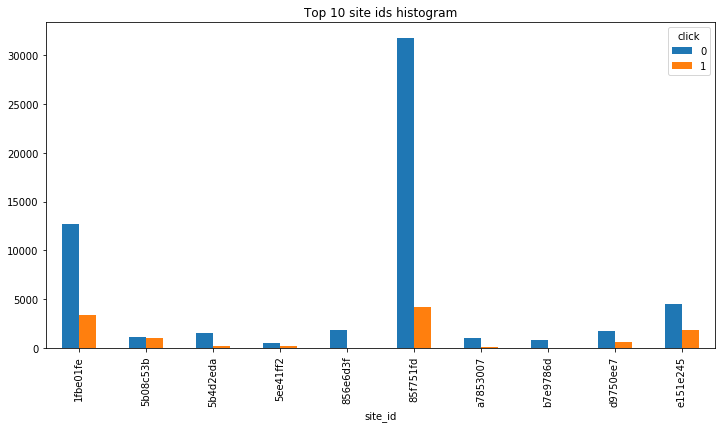

In [38]:
top10_sites = train[(train.site_id.isin((train.site_id.value_counts()/len(train))[0:10].index))]
top10_sites_click = top10_sites[top10_sites['click'] == 1]
top10_sites.groupby(['site_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 site ids histogram');

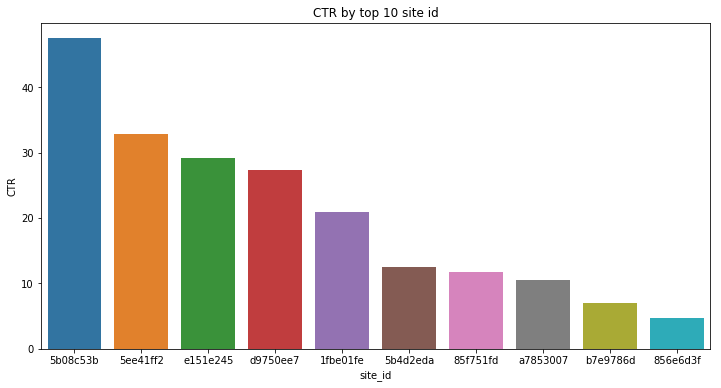

In [39]:
df_site = top10_sites[['site_id','click']].groupby(['site_id']).count().reset_index()
df_site = df_site.rename(columns={'click': 'impressions'})
df_site['clicks'] = top10_sites_click[['site_id','click']].groupby(['site_id']).count().reset_index()['click']
df_site['CTR'] = df_site['clicks']/df_site['impressions']*100
sort_site = df_site.sort_values(by='CTR',ascending=False)['site_id'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_id', data=df_site, order=sort_site)
plt.title('CTR by top 10 site id');

In [40]:
print("There are {} site domains in the data set".format(train.site_domain.nunique()))


There are 1307 site domains in the data set


In [41]:
print('The top 10 site domains that have the most impressions')
print((train.site_domain.value_counts()/len(train))[0:10])

The top 10 site domains that have the most impressions
c4e18dd6    0.37340
f3845767    0.16120
7e091613    0.08151
7687a86e    0.03204
98572c79    0.02504
16a36ef3    0.02073
58a89a43    0.01940
b12b9f85    0.00950
9d54950b    0.00903
17d996e6    0.00879
Name: site_domain, dtype: float64


In [42]:
top10_domains = (train.site_domain.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_domains:
    click_avg=train.loc[np.where((train.site_domain == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site domain value: {},  click through rate: {}".format(i,click_avg))

for site domain value: c4e18dd6,  click through rate: 0.12198714515265131
for site domain value: f3845767,  click through rate: 0.20899503722084367
for site domain value: 7e091613,  click through rate: 0.25579683474420317
for site domain value: 7687a86e,  click through rate: 0.4597378277153558
for site domain value: 98572c79,  click through rate: 0.26717252396166136
for site domain value: 16a36ef3,  click through rate: 0.14085865894838398
for site domain value: 58a89a43,  click through rate: 0.04690721649484536
for site domain value: b12b9f85,  click through rate: 0.07157894736842105
for site domain value: 9d54950b,  click through rate: 0.12846068660022147
for site domain value: 17d996e6,  click through rate: 0.3265073947667804


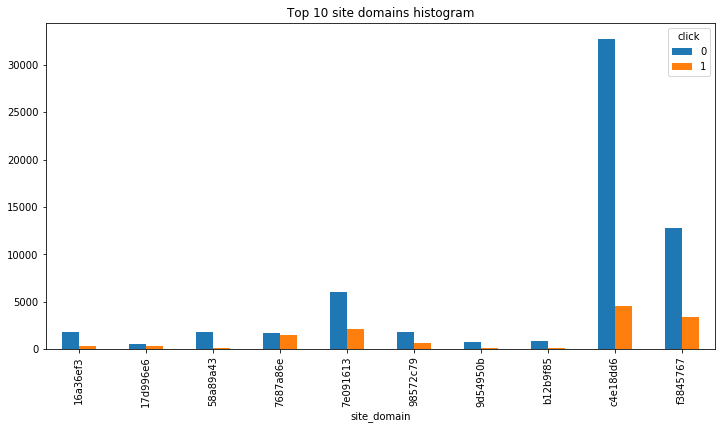

In [43]:

top10_domain = train[(train.site_domain.isin((train.site_domain.value_counts()/len(train))[0:10].index))]
top10_domain_click = top10_domain[top10_domain['click'] == 1]
top10_domain.groupby(['site_domain', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 site domains histogram');

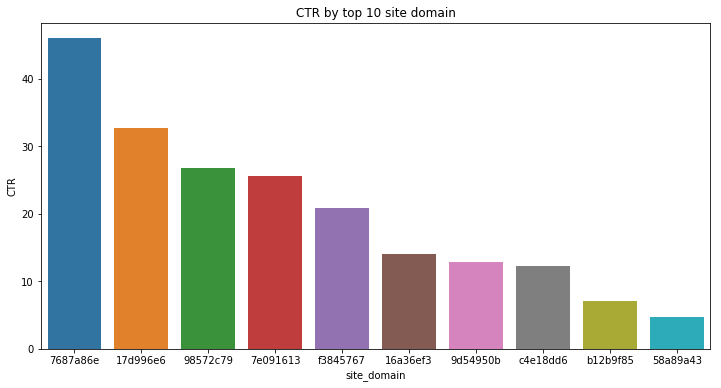

In [44]:
df_domain = top10_domain[['site_domain','click']].groupby(['site_domain']).count().reset_index()
df_domain = df_domain.rename(columns={'click': 'impressions'})
df_domain['clicks'] = top10_domain_click[['site_domain','click']].groupby(['site_domain']).count().reset_index()['click']
df_domain['CTR'] = df_domain['clicks']/df_domain['impressions']*100
sort_domain = df_domain.sort_values(by='CTR',ascending=False)['site_domain'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_domain', data=df_domain, order=sort_domain)
plt.title('CTR by top 10 site domain');

In [45]:
print("There are {} site categories in the data set".format(train.site_category.nunique()))


There are 19 site categories in the data set


In [46]:
print('The top 10 site categories that have the most impressions')
print((train.site_category.value_counts()/len(train))[0:10])

The top 10 site categories that have the most impressions
50e219e0    0.40752
f028772b    0.31298
28905ebd    0.18335
3e814130    0.07624
f66779e6    0.00603
75fa27f6    0.00405
335d28a8    0.00333
76b2941d    0.00248
c0dd3be3    0.00115
70fb0e29    0.00073
Name: site_category, dtype: float64


In [47]:

top10_categories = (train.site_category.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_categories:
    click_avg=train.loc[np.where((train.site_category == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site category value: {},  click through rate: {}".format(i,click_avg))

for site category value: 50e219e0,  click through rate: 0.1284108755398508
for site category value: f028772b,  click through rate: 0.1764329989136686
for site category value: 28905ebd,  click through rate: 0.21003545132260704
for site category value: 3e814130,  click through rate: 0.28213536201469047
for site category value: f66779e6,  click through rate: 0.04477611940298507
for site category value: 75fa27f6,  click through rate: 0.12098765432098765
for site category value: 335d28a8,  click through rate: 0.0990990990990991
for site category value: 76b2941d,  click through rate: 0.016129032258064516
for site category value: c0dd3be3,  click through rate: 0.10434782608695652
for site category value: 70fb0e29,  click through rate: 0.1780821917808219


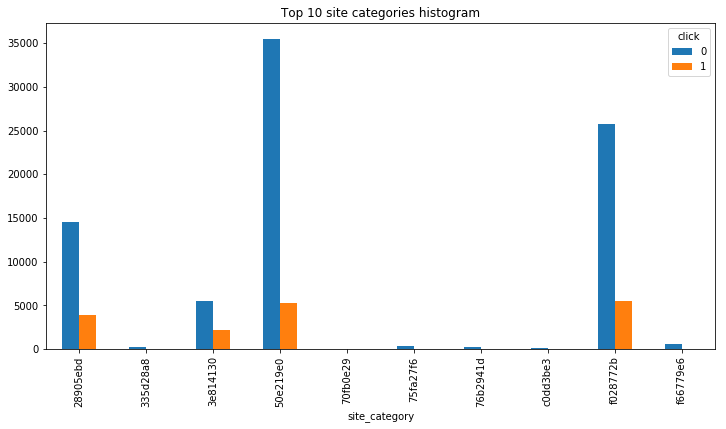

In [48]:
top10_category = train[(train.site_category.isin((train.site_category.value_counts()/len(train))[0:10].index))]
top10_category_click = top10_category[top10_category['click'] == 1]
top10_category.groupby(['site_category', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 site categories histogram');

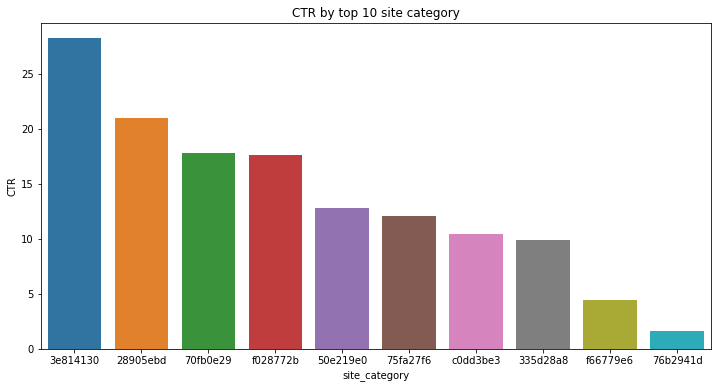

In [49]:
df_category = top10_category[['site_category','click']].groupby(['site_category']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_category_click[['site_category','click']].groupby(['site_category']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['site_category'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_category', data=df_category, order=sort_category)
plt.title('CTR by top 10 site category');

In [50]:
print("There are {} devices in the data set".format(train.device_id.nunique()))


There are 16701 devices in the data set


In [51]:
print('The top 10 devices that have the most impressions')
print((train.device_id.value_counts()/len(train))[0:10])

The top 10 devices that have the most impressions
a99f214a    0.82676
0f7c61dc    0.00052
c357dbff    0.00048
afeffc18    0.00026
936e92fb    0.00022
d857ffbb    0.00012
28dc8687    0.00011
987552d1    0.00009
03559b29    0.00008
b09da1c4    0.00008
Name: device_id, dtype: float64


In [52]:
top10_devices = (train.device_id.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.device_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device id value: {},  click through rate: {}".format(i,click_avg))

for device id value: a99f214a,  click through rate: 0.17320625090715563
for device id value: 0f7c61dc,  click through rate: 0.7115384615384616
for device id value: c357dbff,  click through rate: 0.5833333333333334
for device id value: afeffc18,  click through rate: 0.15384615384615385
for device id value: 936e92fb,  click through rate: 0.22727272727272727
for device id value: d857ffbb,  click through rate: 0.16666666666666666
for device id value: 28dc8687,  click through rate: 0.0
for device id value: 987552d1,  click through rate: 0.0
for device id value: 03559b29,  click through rate: 0.0
for device id value: b09da1c4,  click through rate: 0.0


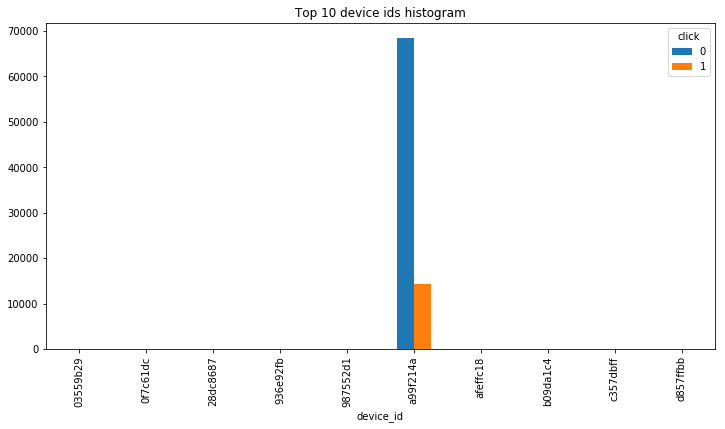

In [53]:
top10_device = train[(train.device_id.isin((train.device_id.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['device_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 device ids histogram');

In [54]:

print("There are {} device ips in the data set".format(train.device_ip.nunique()))
print("There are {} device types in the data set".format(train.device_type.nunique()))
print("There are {} device models in the data set".format(train.device_model.nunique()))
print("There are {} device cnn types in the data set".format(train.device_conn_type.nunique()))

There are 77841 device ips in the data set
There are 4 device types in the data set
There are 3179 device models in the data set
There are 4 device cnn types in the data set


In [55]:
print('The impressions by device types')
print((train.device_type.value_counts()/len(train)))

The impressions by device types
1    0.92386
0    0.05440
4    0.01837
5    0.00337
Name: device_type, dtype: float64


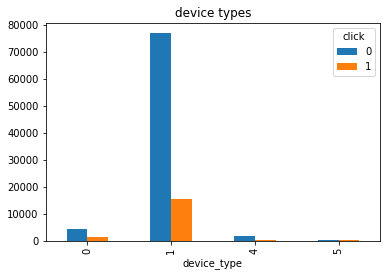

In [56]:
train[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar', title='device types');

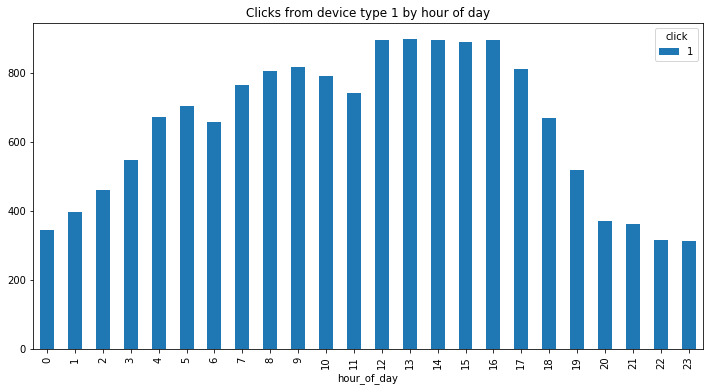

In [57]:
df_click[df_click['device_type']==1].groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Clicks from device type 1 by hour of day", figsize=(12,6));

In [58]:
device_type_click = df_click.groupby('device_type').agg({'click':'sum'}).reset_index()
device_type_impression = train.groupby('device_type').agg({'click':'count'}).reset_index().rename(columns={'click': 'impressions'})
merged_device_type = pd.merge(left = device_type_click , right = device_type_impression, how = 'inner', on = 'device_type')

In [59]:
merged_device_type['CTR'] = merged_device_type['click'] / merged_device_type['impressions']*100


In [60]:
merged_device_type


,device_type,click,impressions,CTR
0,0,1156,5440,21.250000
1,1,15549,92386,16.830472
2,4,191,1837,10.397387
3,5,34,337,10.089021


In [61]:
print("There are {} apps in the data set".format(train.app_id.nunique()))
print("There are {} app domains in the data set".format(train.app_domain.nunique()))
print("There are {} app categories in the data set".format(train.app_category.nunique()))

There are 1296 apps in the data set
There are 91 app domains in the data set
There are 21 app categories in the data set


In [62]:
print('The impressions by app categories')
print((train.app_category.value_counts()/len(train)))

The impressions by app categories
07d7df22    0.64830
0f2161f8    0.23608
cef3e649    0.04193
8ded1f7a    0.03681
f95efa07    0.02783
d1327cf5    0.00309
dc97ec06    0.00143
09481d60    0.00130
75d80bbe    0.00099
4ce2e9fc    0.00060
fc6fa53d    0.00059
879c24eb    0.00028
a3c42688    0.00026
0f9a328c    0.00018
a86a3e89    0.00013
4681bb9d    0.00007
2281a340    0.00007
0bfbc358    0.00002
79f0b860    0.00002
8df2e842    0.00001
0d82db25    0.00001
Name: app_category, dtype: float64


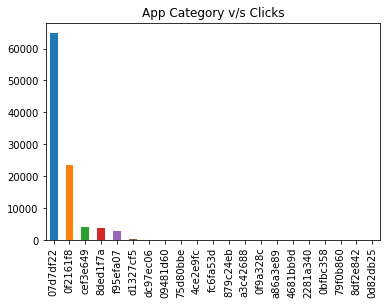

In [63]:
train['app_category'].value_counts().plot(kind='bar', title='App Category v/s Clicks')


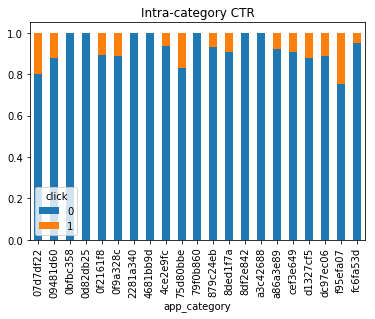

In [64]:
train_app_category = train.groupby(['app_category', 'click']).size().unstack()
train_app_category.div(train_app_category.sum(axis=1), axis=0).plot(kind='bar', stacked=True, title="Intra-category CTR");

In [65]:
print("There are {} C14 in the data set".format(train.C14.nunique()))
print("There are {} C15 in the data set".format(train.C15.nunique()))
print("There are {} C16 in the data set".format(train.C16.nunique()))
print("There are {} C17 in the data set".format(train.C17.nunique()))
print("There are {} C18 in the data set".format(train.C18.nunique()))
print("There are {} C19 in the data set".format(train.C19.nunique()))
print("There are {} C20 in the data set".format(train.C20.nunique()))

There are 1706 C14 in the data set
There are 8 C15 in the data set
There are 9 C16 in the data set
There are 394 C17 in the data set
There are 4 C18 in the data set
There are 64 C19 in the data set
There are 154 C20 in the data set


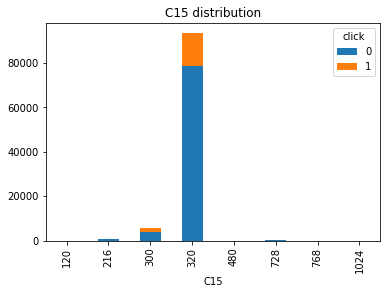

In [66]:
train.groupby(['C15', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C15 distribution');

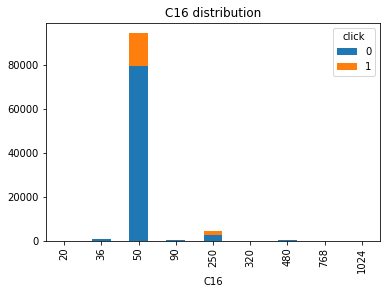

In [67]:
train.groupby(['C16', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C16 distribution');

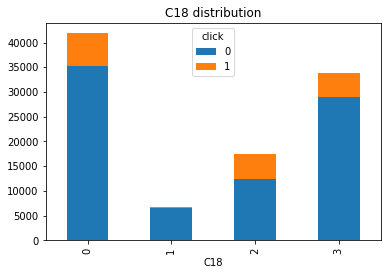

In [68]:
train.groupby(['C18', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C18 distribution');